## Executive Summary
In this report I have selected a book "Project Gutenberg's Punchinello, Vol. 1, No. 9, May 28, 1870". First of all I have used pandas to explore few features of the book i.e., counts, check the null values etc., but as a NLP based analysis for this kind of dataset is preffered. I have used NLTK library to complete most of the tasks. In data preparation section, I have contained in the dataset folder and selected one file to work on and computed its length. In the next section, I have checked the book rich ratio and how many times author has mentioned himself. Moreover, I have performed tokenization and computed and plotted the distribution frequency for the selected books. Similarly, I have plotted the word cloud for tokenization as well. At the end the EDA, I have mentioned three questions and next section, answers to those questions where I have made function to get the list of words, sentences and names of human and cities. Moreover, I have plotted the work cloud for all of these questions. In the last portion, I have suggested a method and provided its solution to the best of my knowledge.

# Data Cleaning and Preparations


1. Importing Libraries

First of all I am going to import all the libraries which are being used in this report in below cell. Since I will be doing NLP Analysis, NLTK will be used 

In [1]:
# In this part I am going to import libraries which I will be using
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import os
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import warnings
warnings.filterwarnings('ignore')


Load all the files of dataset

In [2]:
#lets load all the dataset
dir_path = 'dataset'
#os.listdir(dir_path) #hiding output to avoid plagiarism

There are multiple approaches to perform nlp analysis, one of them is using pandas library, but in this type of dataset pandas will not be of much help. Lets check how it works on it

In [3]:
# Now select one file with wich I will be exploring dataaset, this time i am using pandas
data=pd.read_csv('dataset/10651.txt', sep='\t')

**here, It can be observed that pandas library hasn't effectively loaded our dataset. Lets see how other parameters of pandas are looking**

In [4]:
data.describe() #check unique and total words, which can be observed by the pandas.

,"The Project Gutenberg eBook, Audio: Shenandoah, by Roger McGuinn"
count,386
unique,369
top,Away--we're bound away 'cross the wide Missouri!
freq,7


In [5]:
data.isnull() #see if there is any null point in the lines of dataset

,"The Project Gutenberg eBook, Audio: Shenandoah, by Roger McGuinn"
0,False
1,False
2,False
3,False
4,False
...,...
381,False
382,False
383,False
384,False


In [6]:
data.info() #checking the info about the dataset using pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 1 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   The Project Gutenberg eBook, Audio: Shenandoah, by Roger McGuinn  386 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [7]:
data.value_counts() #counting datatypes and ther count using pandas

The Project Gutenberg eBook, Audio: Shenandoah, by Roger McGuinn      
Away--we're bound away 'cross the wide Missouri!                          7
Way-aye, you rolling river                                                6
with this eBook or online at www.gutenberg.org                            2
Oh Shenandoah, I love your daughter                                       2
I'll take her 'cross yon rolling water                                    2
                                                                         ..
Language: English                                                         1
LIABLE TO YOU FOR ACTUAL, DIRECT, INDIRECT, CONSEQUENTIAL, PUNITIVE OR    1
LIABILITY, BREACH OF WARRANTY OR BREACH OF CONTRACT EXCEPT THOSE          1
International donations are gratefully accepted, but we cannot make       1
your written explanation.  The person or entity that provided you with    1
Length: 369, dtype: int64

**Note: In above mentioned cell, it can be observed that pandas library is not working effectively, since its a text based dataset, It is more appropriate to apply NLP analysis on it. From Now on I will be using simple python and NLTK for further analysis**

In [8]:
# Now lets load a book from the dataset
# Title: Reform Cookery Book

data = open('dataset/11067.txt','r')
raw = data.read() #reading the contect of data

In [9]:
#since the file has been saved in a variable "raw", lets checkout what is the length of this file
print(len(raw)) 

295424


In [10]:
print(set(raw))

{'Z', 'V', 'S', '*', 'n', 'T', 'm', 'q', 'r', 'x', 'k', 'h', 'z', 'j', ')', 'N', '\n', 'P', 'D', '%', 'ì', 'v', 'l', ':', 'A', '/', 't', '?', 'w', '@', 'W', '}', 'M', '3', '£', '#', '0', 'O', '.', '7', "'", 'L', ']', 'H', 'B', 's', '-', '2', 'ò', 'p', '_', '6', '<', 'y', 'Q', '(', 'X', 'o', ',', '>', '[', 'I', 'C', 'b', 'G', 'e', ' ', '!', 'a', '"', 'Y', '$', 'E', 'R', '9', 'd', 'K', 'f', '8', '1', 'i', 'U', 'F', '4', '&', '5', 'g', ';', 'u', 'c', 'J'}


# Exploratory Data Analysis


Here, I am applying NLP analysis on the dataset

In [11]:
#now lets us check if the book contains and distint words or punctuations
distinct_words = len(set(raw))
print('Distinct are:', distinct_words)

Distinct are: 91


In [12]:
# to determine how rich is authors text, lets compute its rich book ratio
rich = len(set(raw)) / len(raw)
print('Ratio is', rich)

Ratio is 0.0003080318457538995


In [13]:
#check how many time author referenced himself throughout the book and making it into the percentage
raw.count("I")
word_percent = 100 * raw.count('I') / len(raw)
print('Authors refferes him', word_percent, 'percent of time!' )

Authors refferes him 0.21866876083188908 percent of time!


In [14]:
# Tokenizers divide strings into lists of substrings
# I have used the sent_tokenize() method to split a document or paragraph into sentences.
tokenized_text=sent_tokenize(raw)

In [15]:
# I have used the word_tokenize() method to split a sentence into tokens or words.
tokenized_word=word_tokenize(raw)

In [16]:
#this will provide a frequency distribution of dataset selected. 
#Generally a frequency distribution keeps track of how frequently an experiment's results have happened.
fdist = FreqDist(tokenized_word) 
print(fdist)


<FreqDist with 6152 samples and 60896 outcomes>


In [17]:
fdist.most_common(20) #it will show the 20 most common freq. distributions

[(',', 4529),
 ('.', 3272),
 ('and', 2009),
 ('the', 1797),
 ('of', 1330),
 ('a', 1253),
 ('to', 1105),
 ('in', 1051),
 ('or', 858),
 ('with', 686),
 ('be', 592),
 ('is', 581),
 ('for', 486),
 ("''", 391),
 ('as', 372),
 ('--', 354),
 ('are', 350),
 ('``', 285),
 ('*', 279),
 ('it', 261)]

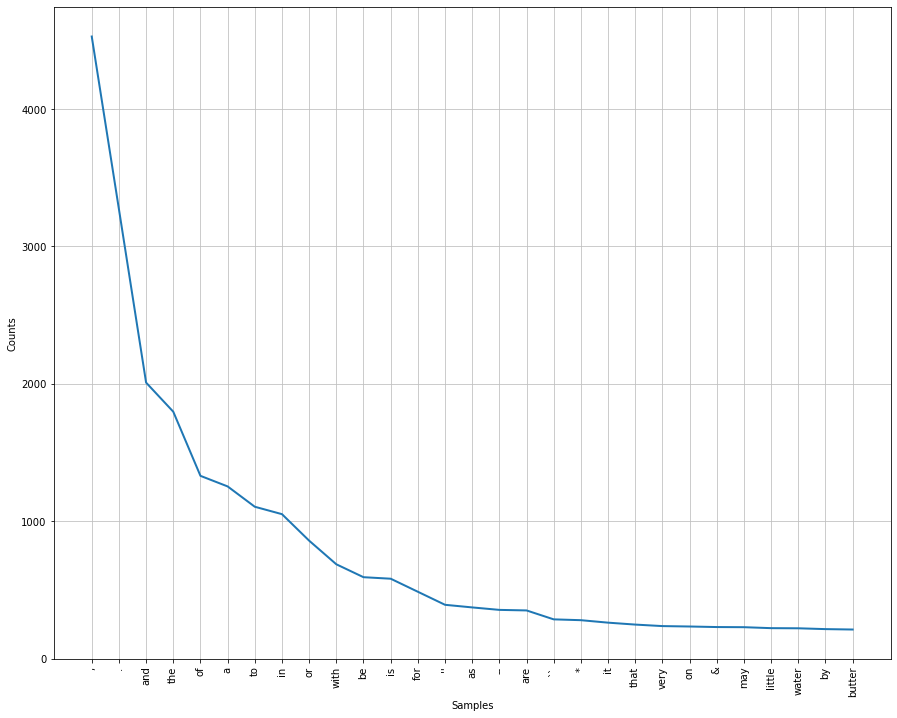

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
# Frequency Distribution Plot
plt.figure(figsize=(15 , 12))
fdist.plot(29,cumulative=False)


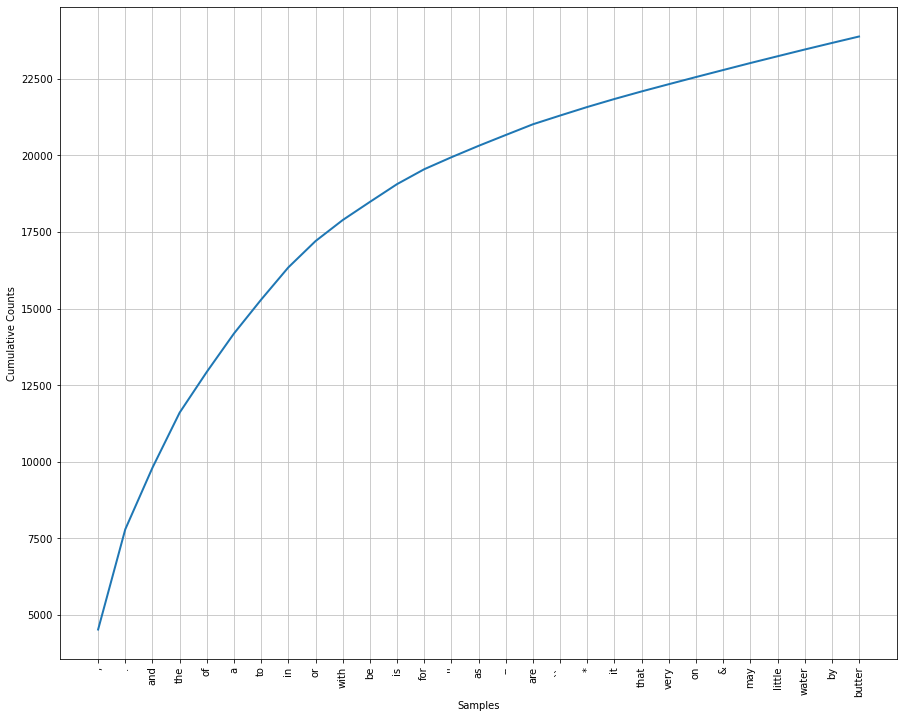

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [19]:
# lets plots the frequency distribution
plt.figure(figsize=(15 , 12))
fdist.plot(29, cumulative=True)



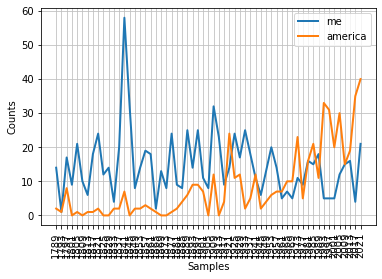

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# nltk.download('inaugural')
from nltk.corpus import inaugural
# extracting the first four characters, using fileid[:4] to get the year 
[fileid[:4] for fileid in inaugural.fileids()]
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'me']
           if w.lower().startswith(target)) 
cfd.plot()

(-0.5, 1598.5, 799.5, -0.5)

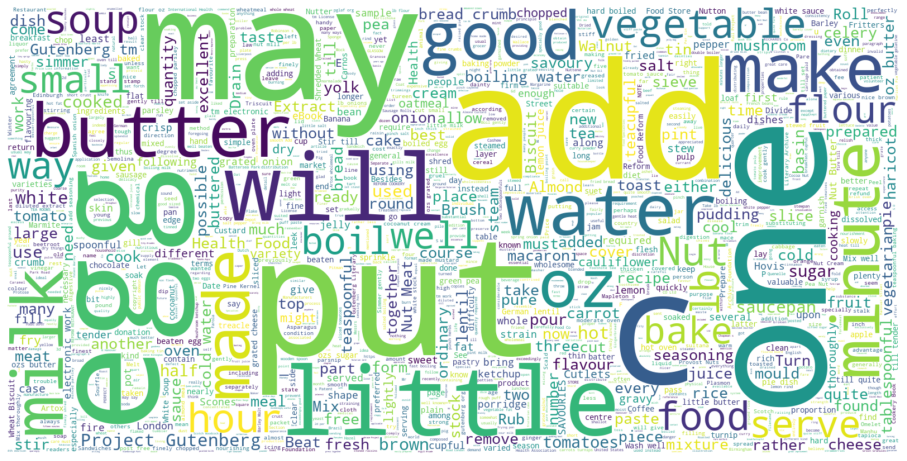

In [21]:
#for exploratory data analysis, wordcloud is a good sorce to visualize basic words. 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #importing wordcloud generator
string=" ".join(tokenized_word)
plt.figure(figsize=(16,15)) 
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=1500, max_font_size= 299,  width=1599, height=800)
wc.generate(string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear") #defining image properties
plt.axis('off') #will not select axis

From above exploratory data analysis we can observe that the NLP analysis of text is different from other kind of analysis. so we can observe many important aspects from this. As per the requirement of report, I have opted three questions, given as

**Question 1: Can we Get the Names of Humans or Places in the Book?**

**Question 2: Can we Make a list of words and plot its wordcloud?**

**Question 3: Create a list of sentences of this book**

# Descriptive Analytics


**Question 1: Answer**

In [22]:
def get_human_names(raw): #lets make a function to get places and human names in the selected book
    person_list = []  #initializing an empty array for person_list
    person_names=person_list #assigning the value of person_list to person_names
    tokens = nltk.tokenize.word_tokenize(raw)  #initializing tokenization as before
    pos = nltk.pos_tag(tokens)  #assigning part of speech tagging with obtained tokens
    sentt = nltk.ne_chunk(pos, binary = False)  #performing chunking on the selected text
    person = []  #assigning empty array
    name = "" #assigning empty array
    for subtree in sentt.subtrees(filter=lambda t: t.label() == 'PERSON'): #loop to extract the names
        for leaf in subtree.leaves():
            person.append(leaf[0])
        if len(person) > 1: #avoid grabbing lone surnames
            for part in person:
                name += part + ' '  
            if name[:-1] not in person_list:
                person_list.append(name[:-1])  #appending names to the array
            name = ''
        person = []
    return person_list #returning complete list

In [23]:
# nltk.download('words') #downloading nltk data
human_names = get_human_names(raw) #obtaining names from datset and assigning it to human_names
#print(human_names) #printing complete names

(-0.5, 1598.5, 799.5, -0.5)

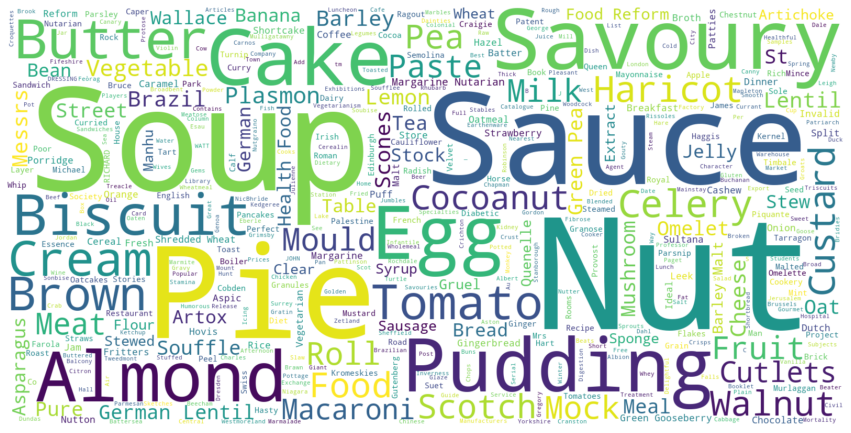

In [24]:
string=" ".join(human_names)
plt.figure(figsize=(15,16)) 
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=1500, max_font_size= 299,  width=1599, height=800)
wc.generate(string) 

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear") #defining image properties
plt.axis('off') #will not select axis

**Question 2: Answer**

In [25]:
# This function removes punctuation
def remove_punctuation(st,exception=''):
    punctuation = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
    punctuation = punctuation.replace(exception,'')
    for c in st:
        if c in punctuation:
            st = st.replace(c,'')
    return st
# This function that takes in a book and returns a list of words
def create_word_list(st): 
    st  = remove_punctuation(st)
    return word_tokenize(st)


In [26]:
# create a list of all the words in the book
words = create_word_list(raw)

(-0.5, 1598.5, 799.5, -0.5)

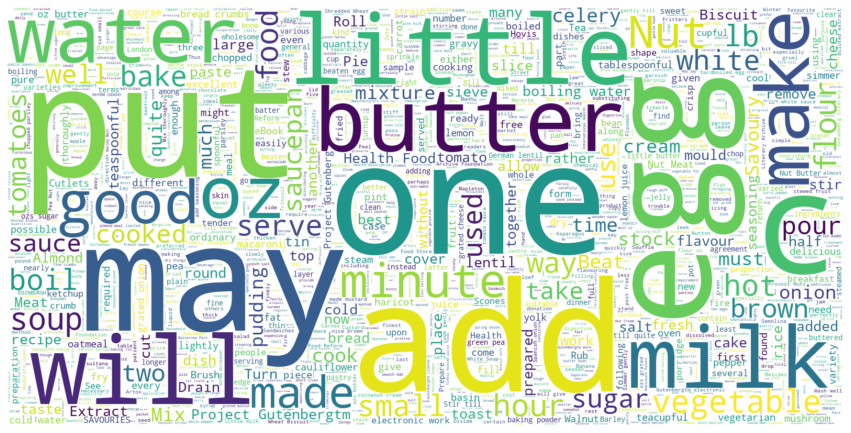

In [27]:
string=" ".join(words)
plt.figure(figsize=(15,16)) 
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=1500, max_font_size= 299,  width=1599, height=800)
wc.generate(string) 

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear") #defining image properties
plt.axis('off') #will not select axis

**Question 3: Answere**

In [28]:
# This function that takes in a book and returns a list of sentences
def create_sentence_list(st):
    st = remove_punctuation(st,'.')
    return sent_tokenize(st)

In [29]:
# create a list of all the sentences in the book
sentences = create_sentence_list(raw)

(-0.5, 1598.5, 799.5, -0.5)

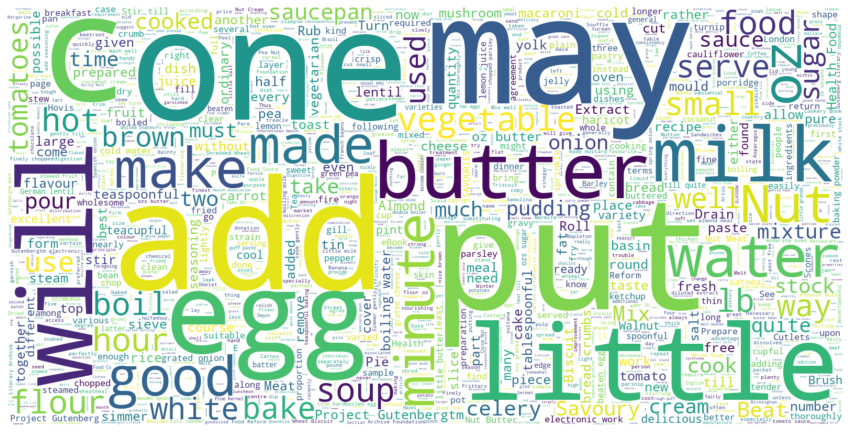

In [30]:
string=" ".join(sentences)
plt.figure(figsize=(15,16)) 
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=1500, max_font_size= 299,  width=1599, height=800)
wc.generate(string) 

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear") #defining image properties
plt.axis('off') #will not select axis

# Suggestions

**Suggestion 1:**

Data enrichment can be performed by merging multiple datasets into one. For this purpose, we can merge multiple text files into one. By doing this we can improve NLP analysis on books, specially sentiment analysis and related analysis.

**Suggestion 1: Solution**

In [31]:
data = data2 = ""
  
# Reading data from file1
with open('dataset/11067.txt') as fp:
    data = fp.read()
    
# Reading data from file2

with open('dataset/10314.txt') as fp:
    data2 = fp.read()
# Merge Both files
data += "\n"
data += data2
  
with open ('newdata.txt', 'w') as fp:
    fp.write(data)

In [32]:
data = open('newdata.txt','r',errors = 'ignore') #loading the updated datset
raw1 = data.read()

In [33]:
print(len(raw1)) #obtaining the length of new dataset

503440


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #using builtin module of sentiment analysis
#reference of this is given in the biography


In [35]:
sentiment = SentimentIntensityAnalyzer() #applying sentiment analysis


In [36]:
sent_2 = sentiment.polarity_scores(raw1) #computing polarity score of sentiment analysis


In [37]:
print("Sentiment is:", sent_2) #printing the polarity score

Sentiment is: {'neg': 0.074, 'neu': 0.775, 'pos': 0.151, 'compound': 1.0}


## Bibliography
List all sources you have utilised in the making of this report here in this single markdown cell.

While working with this report, I have learned from many sources and took guidelines from few github repositories, books and blogs all the sources are referenced as:

1. NLTK Guide Example: https://www.nltk.org/book/ch04.html

2. Stackover flow help for wordcloud: https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

3. Using Pandas for text analysis: https://www.kaggle.com/code/terminate9298/starter-gutenberg-poetry-dataset

4. Github: https://github.com/pgcorpus/gutenberg-analysis

5. Sentiment Analysis: https://pypi.org/project/vaderSentiment/

6. Text Summarization: https://stackabuse.com/text-summarization-with-nltk-in-python/

7. Beautifull Soap help: https://lxml.de/elementsoup.html